In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential

In [2]:
df = pd.read_csv('data_file.csv')

In [3]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


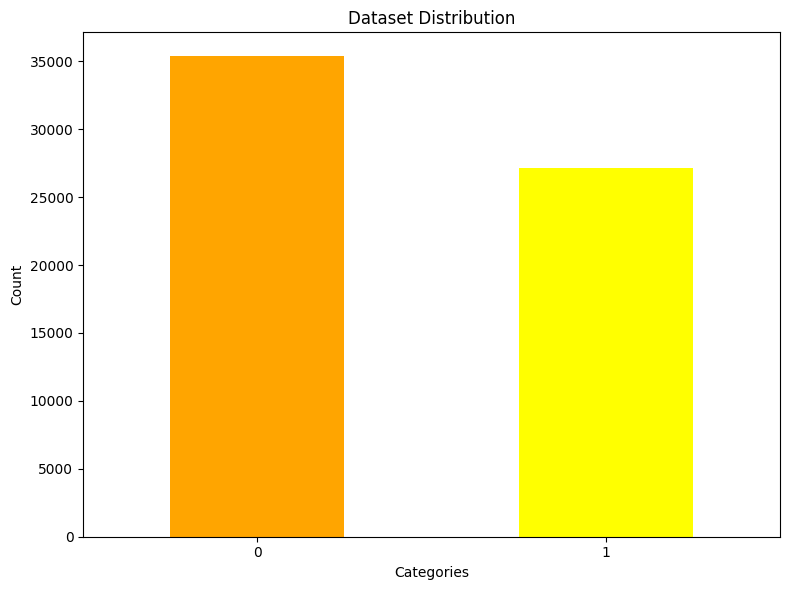

In [4]:
# Dataset Distribution
target_column = df['Benign']
distribution = target_column.value_counts()
plt.figure(figsize=(8, 6)) 
distribution.plot(kind='bar', color=['Orange', 'yellow', 'Black', 'lightskyblue']) 
plt.title('Dataset Distribution')  
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout() 
plt.show() 


In [5]:
df.shape

(62485, 18)

In [6]:
df.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [7]:
df.dtypes

FileName              object
md5Hash               object
Machine                int64
DebugSize              int64
DebugRVA               int64
MajorImageVersion      int64
MajorOSVersion         int64
ExportRVA              int64
ExportSize             int64
IatVRA                 int64
MajorLinkerVersion     int64
MinorLinkerVersion     int64
NumberOfSections       int64
SizeOfStackReserve     int64
DllCharacteristics     int64
ResourceSize           int64
BitcoinAddresses       int64
Benign                 int64
dtype: object

In [8]:
data  = df.drop(columns=['FileName', 'md5Hash'], inplace= True)

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
x =df.iloc[:, :-1]
y = df.iloc[:,-1:]

In [11]:
y.value_counts()

Benign
1         21573
0         10683
Name: count, dtype: int64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 12)
x_train.shape

(25804, 15)

In [13]:
#standard Scaling
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)

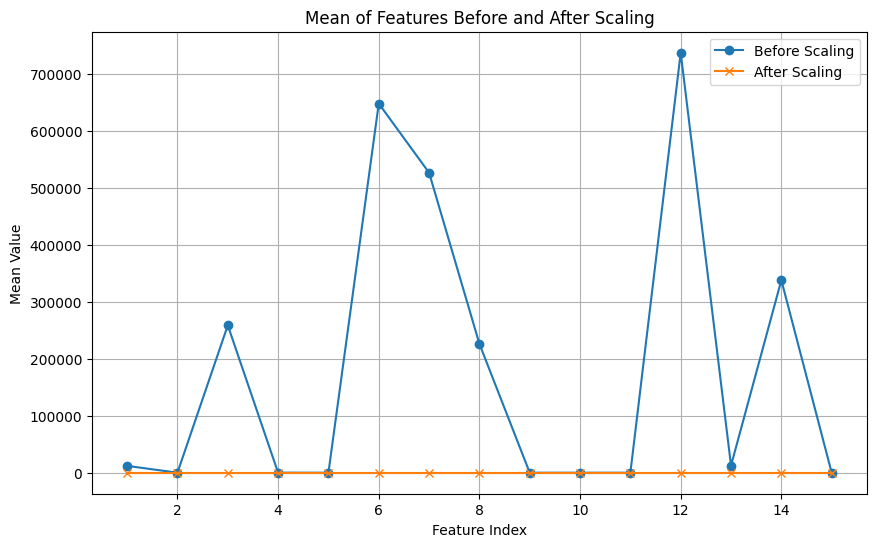

In [14]:
# Standard Scaling 
mean_before_scaling = np.mean(x_train, axis=0)
mean_after_scaling = np.mean(X_train, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_before_scaling) + 1), mean_before_scaling, marker='o', label='Before Scaling')
plt.plot(range(1, len(mean_after_scaling) + 1), mean_after_scaling, marker='x', label='After Scaling')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Mean of Features Before and After Scaling')
plt.legend()
plt.grid(True)
plt.show()


## RandomForest

In [15]:
#Random Forest
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)

C:\Users\SILVE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [16]:
Y_pred_1=RFC.predict(X_test)

In [17]:
#Accurracy 
accuracy=accuracy_score(y_test, Y_pred_1)*100
print(accuracy)

99.31804091754495


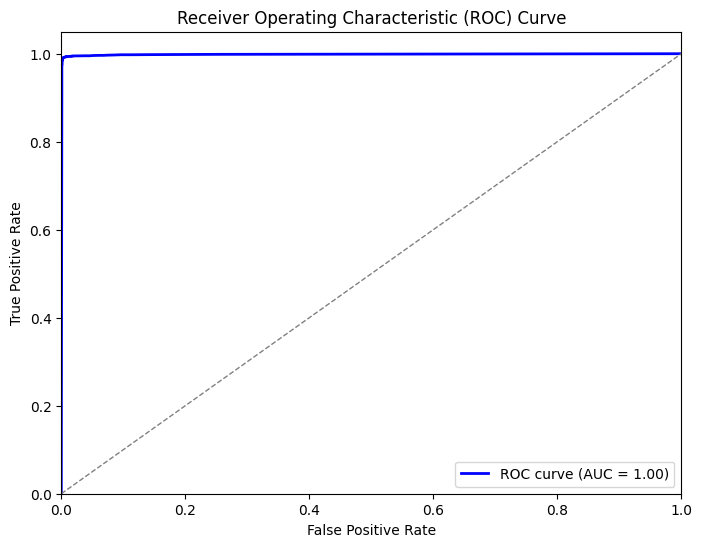

In [18]:
# Plot ROC curve
y_probabilities = RFC.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

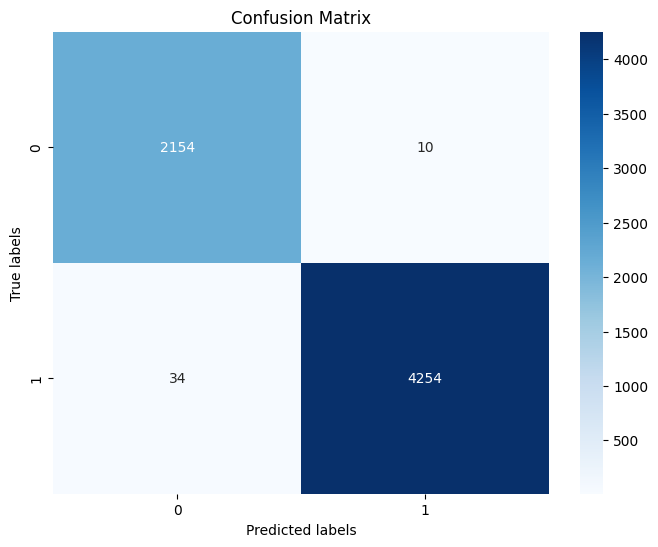

Recall: 0.992070895522388
Precision: 0.9976547842401501
F-beta score: 0.9948550046772684
Accuracy: 99.31804091754495


In [19]:
#confusion matrix for ROC curve 
conf_matrix_1 = confusion_matrix(y_test, Y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
TP = conf_matrix_1[1, 1]
FP = conf_matrix_1[0, 1]
FN = conf_matrix_1[1, 0]
TN = conf_matrix_1[0, 0]
# Recall
recall = TP / (TP + FN)
# Precision
precision = TP / (TP + FP)
# F-beta score (beta = 1 for "F1 score)
beta = 1
f_beta = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
# Accuracy
accuracy_RFC = (TP + TN) / (TP + TN + FP + FN)
print("Recall:", recall)
print("Precision:", precision)
print("F-beta score:", f_beta)
print("Accuracy:", accuracy)

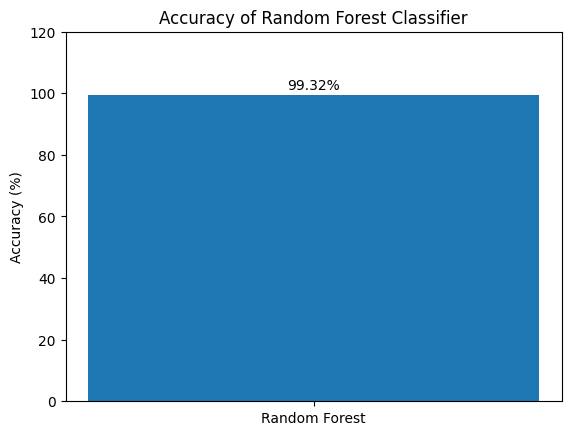

In [20]:
#accurracy Graph
plt.bar(["Random Forest"], [accuracy])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Random Forest Classifier')
plt.ylim(0, 120) 
for i in range(len(["Random Forest"])):
    plt.text(i, accuracy + 1, '{:.2f}%'.format(accuracy), ha='center', va='bottom')
plt.show()

## Support Vector Classifier 

In [22]:
svr = SVC()
svr.fit(X_train, y_train)
y_pred_2 = svr.predict(X_test)
y_pred_rounded = y_pred_2.round()

C:\Users\SILVE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
mse_linear_reg = mean_squared_error(y_test, y_pred_2)
print(mse_linear_reg)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_2)
print(r2)

0.027743335399876008
0.8755384066267553


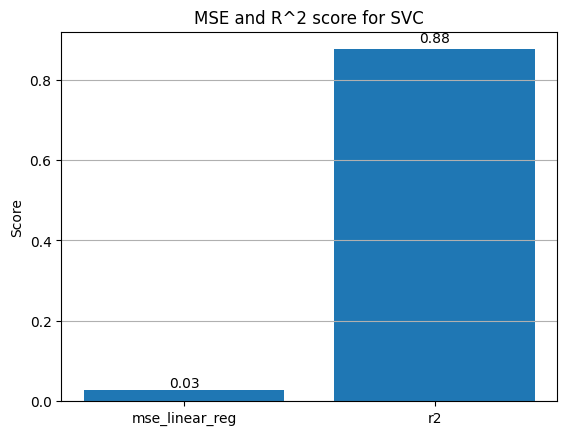

In [25]:
plt.bar(["mse_linear_reg", "r2"], [mse_linear_reg, r2])
plt.ylabel('Score')
plt.title('MSE and R^2 score for SVC')
plt.grid(axis='y')
for i, score in enumerate([mse_linear_reg, r2]):
    plt.text(i, score + 0.01 * score, '{:.2f}'.format(score), ha='center', va='bottom')
plt.show()

## ROC Curve

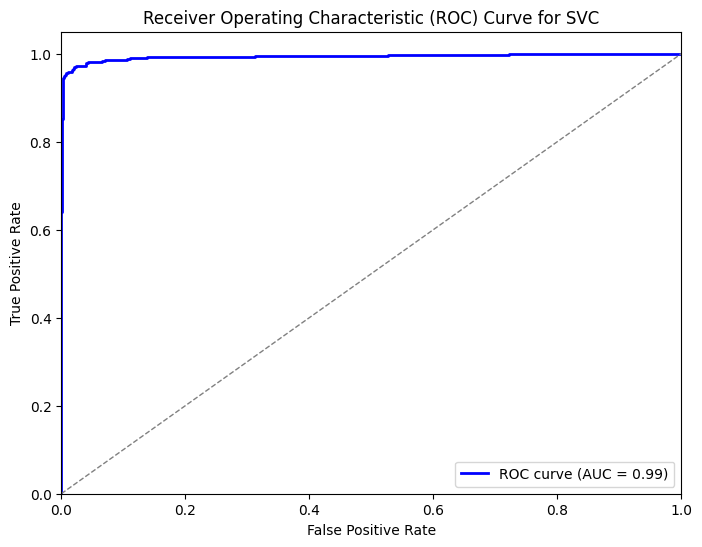

In [26]:
decision_scores = svr.decision_function(X_test)
y_probabilities = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc="lower right")
plt.show()

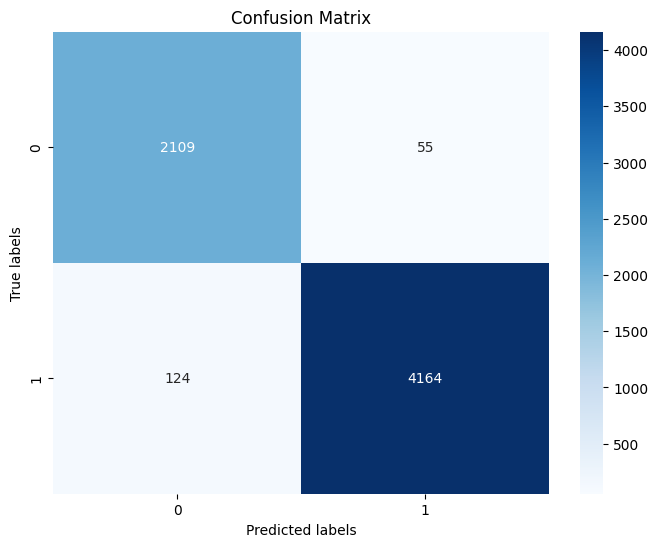

Recall: 0.9710820895522388
Precision: 0.9869637354823418
F-beta score: 0.9789585047607853
Accuracy: 99.31804091754495


In [27]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_rounded)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import precision_score, recall_score, fbeta_score, accuracy_score
# recall
recall = recall_score(y_test, y_pred_rounded)
#precision
precision = precision_score(y_test, y_pred_rounded)
# F-beta
beta = 1
f_beta = fbeta_score(y_test, y_pred_rounded, beta=beta)
# accuracy
accuracy_svc = accuracy_score(y_test, y_pred_rounded)
print("Recall:", recall)
print("Precision:", precision)
print("F-beta score:", f_beta)
print("Accuracy:", accuracy)

## ANN

In [28]:
X, y = make_classification(n_samples=20000, n_features=15, n_classes=2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
ann.fit(X_train, y_train)
y_pred_3 = ann.predict(X_test)
Accuracy =  ann.score(X_test, y_test)
print(Accuracy)

C:\Users\SILVE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9837259764414135


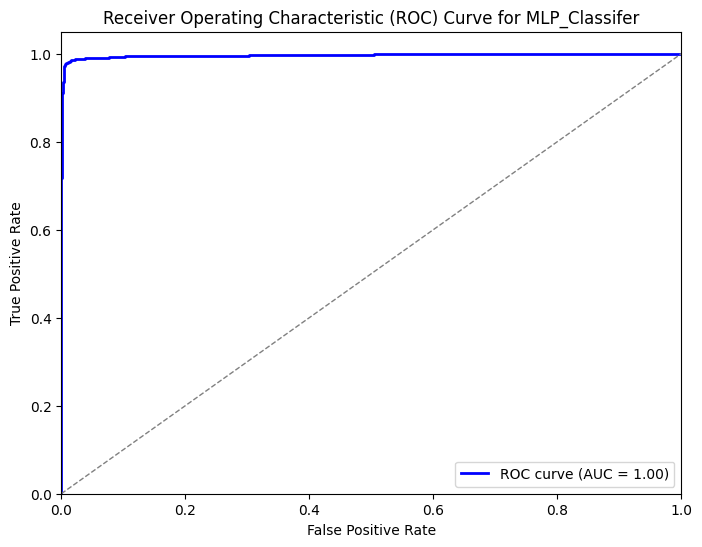

In [29]:
y_probabilities = ann.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP_Classifer')
plt.legend(loc="lower right")
plt.show()

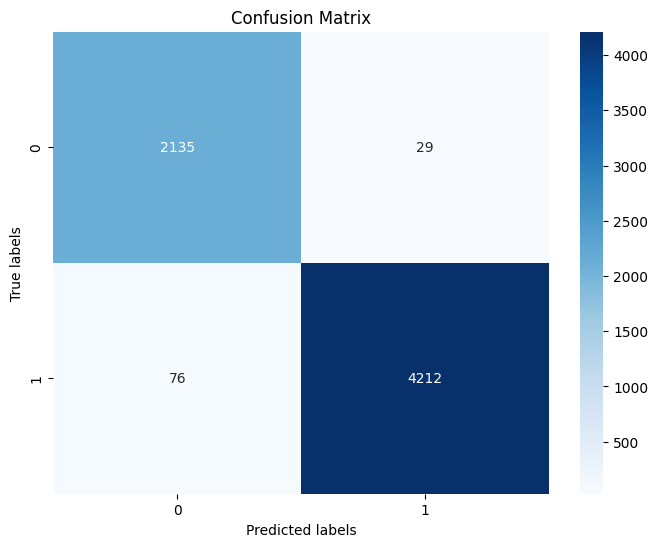

Recall: 0.9710820895522388
Precision: 0.9869637354823418
F-beta score: 0.9789585047607853
Accuracy: 99.31804091754495


In [30]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
plt.show()
from sklearn.metrics import precision_score, recall_score, fbeta_score, accuracy_score
recall = recall_score(y_test, y_pred_rounded)
# precision
precision = precision_score(y_test, y_pred_rounded)
# F-beta
beta = 1
f_beta = fbeta_score(y_test, y_pred_rounded, beta=beta)
# accuracy
accuracy_ANN = accuracy_score(y_test, y_pred_rounded)
print("Recall:", recall)
print("Precision:", precision)
print("F-beta score:", f_beta)
print("Accuracy:", accuracy)


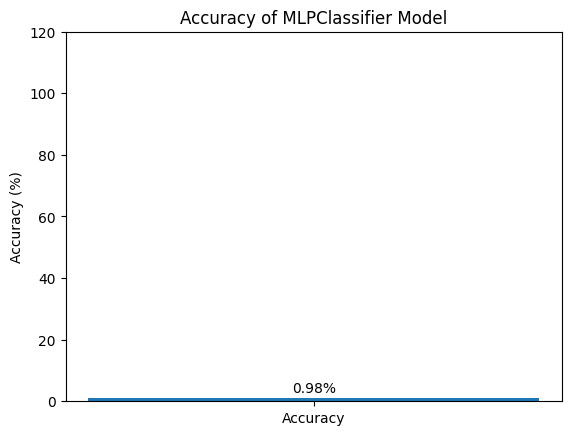

In [31]:
plt.bar(["Accuracy"], [Accuracy])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of MLPClassifier Model')
plt.ylim(0, 120)
for i in range(len(["ANN"])):
    plt.text(i, Accuracy + 1, '{:.2f}%'.format(Accuracy), ha='center', va='bottom')
plt.show()

## Xg-Boost

Accuracy: 0.908 (0.006)


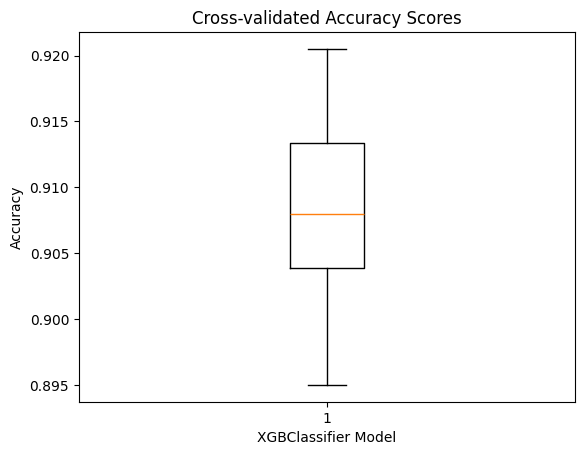

In [32]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
plt.boxplot(n_scores)
plt.xlabel('XGBClassifier Model')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy Scores')
plt.show()

In [36]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
y_pred_flat = y_pred.flatten()
preview = pd.DataFrame(data={
    'Predicted results': y_pred_flat,
    'Actual results': y_test.values.flatten() 
})
print(preview)

      Predicted results  Actual results
0                     1               1
1                     1               1
2                     1               1
3                     1               1
4                     1               1
...                 ...             ...
6447                  1               1
6448                  1               1
6449                  1               1
6450                  0               0
6451                  1               1

[6452 rows x 2 columns]


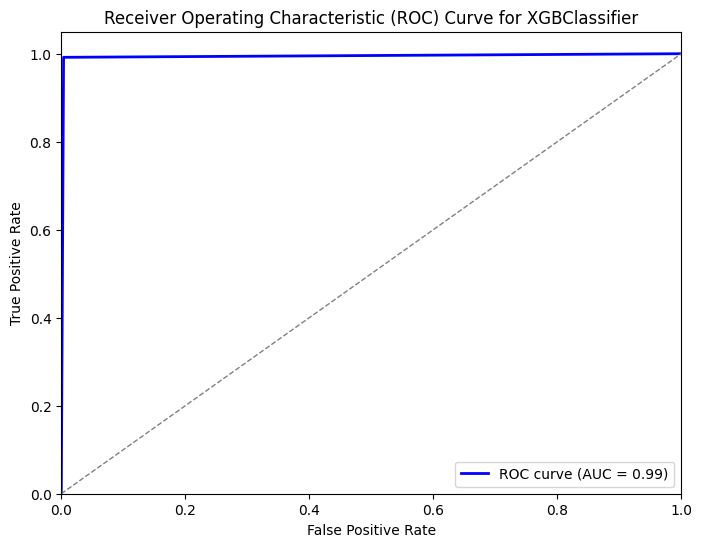

In [38]:
y_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBClassifier')
plt.legend(loc="lower right")
plt.show()

>10 0.987 (0.003)
>50 0.992 (0.002)
>100 0.992 (0.002)
>250 0.993 (0.001)


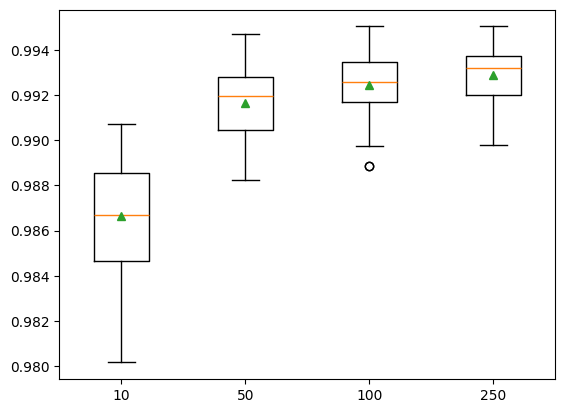

In [42]:
#  xgboost number of trees effect on performance
def get_dataset(df):
    X = df.iloc[:, 2
    :-1].values
    y = df.iloc[:,-1].values
    return X, y
def get_models():
    models = dict()
    trees = [10, 50, 100, 250]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
X, y = get_dataset(df)
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

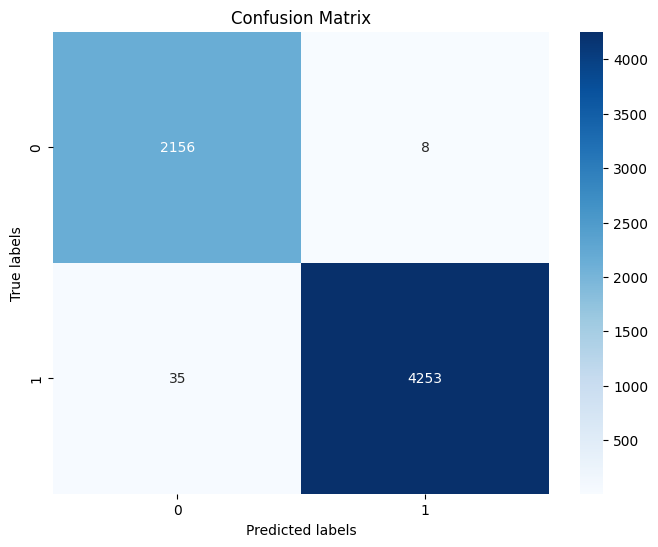

Recall: 0.9710820895522388
Precision: 0.9869637354823418
F-beta score: 0.9789585047607853
Accuracy: 99.31804091754495


In [43]:
conf_matrix_4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
plt.show()
from sklearn.metrics import precision_score, recall_score, fbeta_score, accuracy_score
# recall
recall = recall_score(y_test, y_pred_rounded)
# precision
precision = precision_score(y_test, y_pred_rounded)
# F-beta 
beta = 1
f_beta = fbeta_score(y_test, y_pred_rounded, beta=beta)
# accuracy
accuracy_XG_Boost = accuracy_score(y_test, y_pred_rounded)
print("Recall:", recall)
print("Precision:", precision)
print("F-beta score:", f_beta)
print("Accuracy:", accuracy)

## CNN

In [44]:
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
Test_Accuracy = accuracy*100
print('accuracy',Test_Accuracy)

Epoch 1/20


C:\Users\SILVE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4129/4129 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9261 - loss: 0.2112 - val_accuracy: 0.9671 - val_loss: 0.0931
Epoch 2/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9665 - loss: 0.0975 - val_accuracy: 0.9698 - val_loss: 0.0856
Epoch 3/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9731 - loss: 0.0795 - val_accuracy: 0.9723 - val_loss: 0.0815
Epoch 4/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9742 - loss: 0.0824 - val_accuracy: 0.9766 - val_loss: 0.0682
Epoch 5/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9749 - loss: 0.0772 - val_accuracy: 0.9798 - val_loss: 0.0657
Epoch 6/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9764 - loss: 0.0665 - val_accuracy: 0.9791 - val_loss: 0.0689
Epoch 7/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9768 - loss: 0.0661 - val_accuracy: 0.9785 - val_loss: 0.0626
Epoch 8/20
4129/4129 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9785 - loss: 0.0655 - val_accurac

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


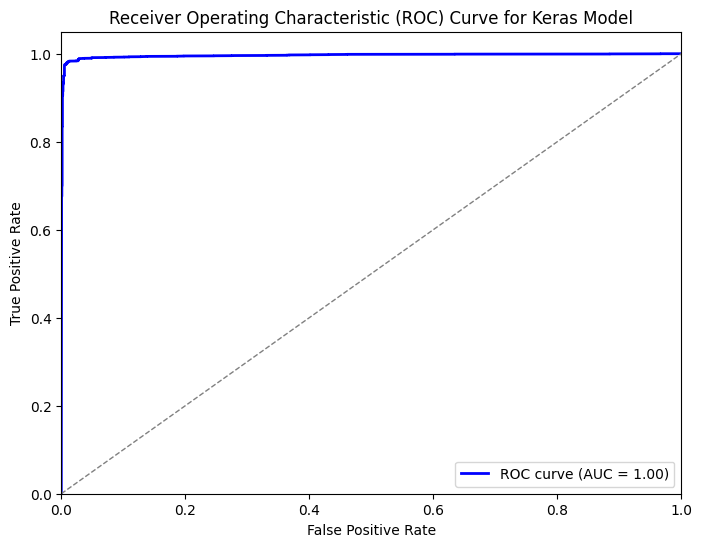

In [45]:
y_probabilities = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Keras Model')
plt.legend(loc="lower right")
plt.show()

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


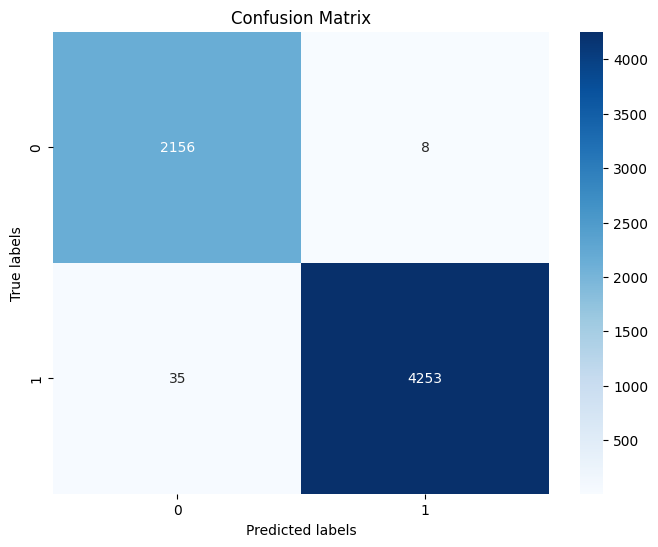

Recall: 0.9710820895522388
Precision: 0.9869637354823418
F-beta score: 0.9789585047607853
Accuracy: 0.9824860692024231


In [46]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")
conf_matrix_5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
plt.show()
recall = recall_score(y_test, y_pred_rounded)
# precision
precision = precision_score(y_test, y_pred_rounded)
# F-beta 
beta = 1
f_beta = fbeta_score(y_test, y_pred_rounded, beta=beta)
# accuracy
accuracy_CNN = accuracy_score(y_test, y_pred_rounded)
print("Recall:", recall)
print("Precision:", precision)
print("F-beta score:", f_beta)
print("Accuracy:", accuracy)


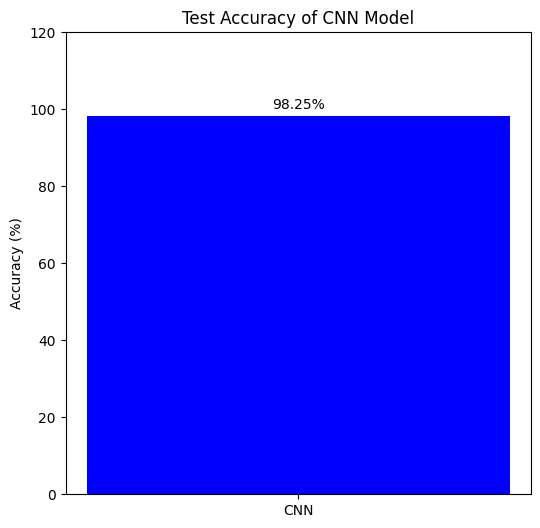

In [47]:
plt.figure(figsize=(6, 6))
plt.bar(["CNN"], [Test_Accuracy], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy of CNN Model')
plt.ylim(0, 120) 
plt.text(0, Test_Accuracy + 1, '{:.2f}%'.format(Test_Accuracy), ha='center', va='bottom') 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


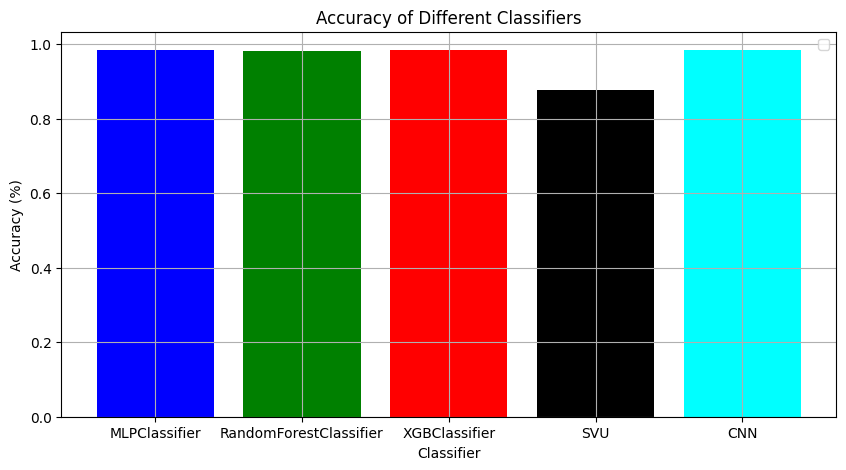

In [48]:
plt.figure(figsize=(10,5)) 
plt.bar("MLPClassifier", Accuracy, color='blue')
plt.bar("RandomForestClassifier", accuracy, color='green')
plt.bar("XGBClassifier", Accuracy, color='red')
plt.bar("SVU", r2,color = 'black')
plt.bar('CNN', Accuracy, color = 'cyan')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()